## Basic Masking
***
Masking is the process of hiding and/or revealing only certain parts of an image. Masking is commonly used in image processing to assist in filtering and/or noise reduction. Masking can also be used to overlay one image on top of another while preserving the original background of the background image. The following example applies a mask to find all circles of a specific color.

In [2]:
# Notebook imports
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

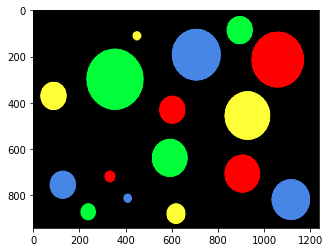

In [19]:
# Reading in the image 
circles = cv2.imread('../Image_Data/Circles.png')

# for display only
rgb_circles = cv2.cvtColor(circles, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_circles)

The original circles image looks like this when converted to rgb. The bgr version will be used throughout the rest of the following code to keep opencv defaults in place.

In [21]:
# Getting the bgr values for the circles
print('green: ', circles[300, 300]) # green
print('yellow: ', circles[350, 100]) # yellow
print('blue: ', circles[750, 100]) # blue
print('red: ', circles[200, 1100]) # red

green:  [ 56 255   0]
yellow:  [ 56 255 255]
blue:  [229 134  72]
red:  [  0   0 255]


References for the bgr values for each of the circle colors.

In [15]:
# method to return image of circles found in desired color range
def find_circles(img, color_range):
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    mask = cv2.inRange(img, color_range[0], color_range[1])
    return cv2.cvtColor(cv2.bitwise_and(img, img, mask=mask), cv2.COLOR_BGR2RGB)

To successfully filter the image, the bitwise_and() method is used. This method matches only pixels that both the mask and the original image contain, or the conjuction of the two images.

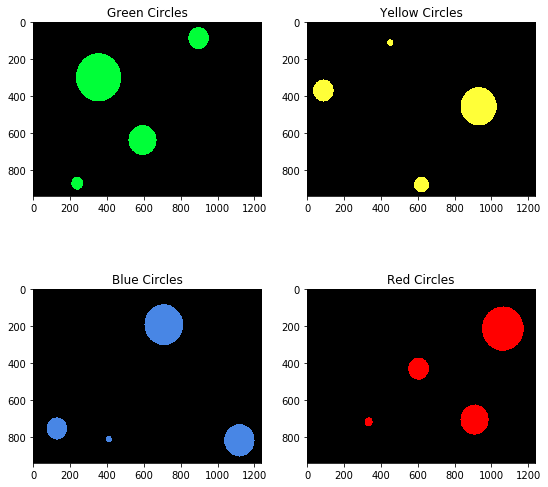

In [16]:
# Lower and upper range bounds for each color
green_range = np.array([[50, 240, 0], [60, 255, 20]], dtype='uint8')
yellow_range = np.array([[40, 240, 240], [60, 255, 255]], dtype='uint8')
blue_range = np.array([[220, 120, 60], [235, 140, 80]], dtype='uint8')
red_range = np.array([[0, 0, 230], [15, 15, 255]], dtype='uint8')

# Getting image results
green_circles = find_circles(circles, green_range)
yellow_circles = find_circles(circles, yellow_range)
blue_circles = find_circles(circles, blue_range)
red_circles = find_circles(circles, red_range)

# Graphing results
fig, axarr = plt.subplots(2, 2, figsize=(9, 9))
axarr[0][0].set_title('Green Circles')
axarr[0][0].imshow(green_circles)
axarr[0][1].set_title('Yellow Circles')
axarr[0][1].imshow(yellow_circles)
axarr[1][0].set_title('Blue Circles')
axarr[1][0].imshow(blue_circles)
axarr[1][1].set_title('Red Circles')
axarr[1][1].imshow(red_circles)

After running the method with the desired color ranges, the mask was able to successfully filter the original image and find all occurences of circles of the desired color.

***
## References
* opencv bitwise operations example: https://docs.opencv.org/master/d0/d86/tutorial_py_image_arithmetics.html
* filtering pokemon game cartridges example: https://www.pyimagesearch.com/2014/08/04/opencv-python-color-detection/
* opencv docs: https://docs.opencv.org/2.4/modules/core/doc/operations_on_arrays.html#inrange

***